# U_PPM XGBoost Model of All GeoChem NT

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import sklearn
%matplotlib inline
sns.set()

## Import and Collate Data

**Import NT-wide Soil, WholeRock, Rockchip and Stream Sediment sample csv files from strike.nt.gov.au and assemble into one dataframe**

In [2]:
date_cols = ['DATE_SAMPLED']

In [3]:
gcrc = pd.read_csv("C:\\Users\\jackg\\OneDrive\\Documents\\Work\\URO\\Data\\NT_Geochemistry_csv\\GEOCHEM_ROCKCHIPS.csv",
                    encoding='ansi',
                     dtype={'SAMPLEID': str, "LITHOLOGY": str, "MINMESH": str, "MAXMESH": str,"COMMENTS": str},
                     parse_dates=date_cols)
gcrc.tail()

,UNIQ_ID,ID,SAMPLEID,SAMPLEREF,SAMPLE_TYPE,SAMPLE_METHOD,DATE_SAMPLED,LATITUDE,LONGITUDE,LITHOLOGY,...,W_PPM,W1_PPM,Y_PPM,YB_PPM,ZN_PCT,ZN_PPB,ZN_PPM,ZR_PCT,ZR_PPB,ZR_PPM
35356,446816,WMCRC8_5532131,5532131,DA962959,ROCKCHIP,ROCKCHIP,NaT,-21.50290,132.95038,metasediment,...,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0
35357,446817,WMCRC8_5532143,5532143,DA962961,ROCKCHIP,ROCKCHIP,NaT,-21.50470,132.95011,gneiss,...,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0
35358,446818,WMCRC8_5532155,5532155,DA962963,ROCKCHIP,ROCKCHIP,NaT,-21.50559,132.94998,granite,...,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0
35359,446819,WMCRC8_5532161,5532161,DA962964,ROCKCHIP,ROCKCHIP,NaT,-21.51118,132.96642,metasediment,...,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0
35360,446820,WMCRC8_5532167,5532167,DA962965,ROCKCHIP,ROCKCHIP,NaT,-21.46276,132.97081,metasediment,...,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0


In [4]:
gcsoil = pd.read_csv("C:\\Users\\jackg\\OneDrive\\Documents\\Work\\URO\\Data\\NT_Geochemistry_csv\\GEOCHEM_SOILS.csv",
                     encoding='ansi',
                     dtype={'SAMPLEID': str, "LITHOLOGY": str, "MINMESH": str, "MAXMESH": str,"COMMENTS": str},
                     parse_dates=date_cols)
gcsoil.tail()

,UNIQ_ID,ID,SAMPLEID,SAMPLEREF,SAMPLE_TYPE,SAMPLE_METHOD,DATE_SAMPLED,LONGITUDE,LATITUDE,LITHOLOGY,...,W_PPM,W1_PPM,Y_PPM,YB_PPM,ZN_PCT,ZN_PPB,ZN_PPM,ZR_PCT,ZR_PPB,ZR_PPM
280081,447401,WMCSO3_6455588,6455588,QD633225,SOIL,CONC,NaT,133.04853,-21.80833,NaN,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,20.0,-9999,-9999.0,-9999.0
280082,447402,WMCSO3_6455673,6455673,QD633233,SOIL,CONC,NaT,133.04855,-21.80123,NaN,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,20.0,-9999,-9999.0,-9999.0
280083,447403,WMCSO3_6455707,6455707,QD633235,SOIL,CONC,NaT,133.04855,-21.79945,NaN,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,20.0,-9999,-9999.0,-9999.0
280084,447404,WMCSO3_6455724,6455724,QD633236,SOIL,CONC,NaT,133.04855,-21.79857,NaN,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,20.0,-9999,-9999.0,-9999.0
280085,447405,WMCSO3_6455741,6455741,QD633238,SOIL,CONC,NaT,133.04856,-21.79679,NaN,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,20.0,-9999,-9999.0,-9999.0


In [5]:
gcss = pd.read_csv("C:\\Users\\jackg\\OneDrive\\Documents\\Work\\URO\\Data\\NT_Geochemistry_csv\\GEOCHEM_STREAM_SEDIMENTS.csv",
                    encoding='ansi',
                     dtype={'SAMPLEID': str, "LITHOLOGY": str, "MINMESH": str, "MAXMESH": str,"COMMENTS": str},
                     parse_dates=date_cols)
gcss.tail()

,UNIQ_ID,ID,SAMPLEID,SAMPLEREF,SAMPLE_TYPE,SAMPLE_METHOD,DATE_SAMPLED,LONGITUDE,LATITUDE,LITHOLOGY,...,W_PPM,W1_PPM,Y_PPM,YB_PPM,ZN_PCT,ZN_PPB,ZN_PPM,ZR_PCT,ZR_PPB,ZR_PPM
116262,450161,ZCL017_7081829,7081829,560433,STREAM,STREAMSED,NaT,134.77500,-16.12817,NaN,...,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,24.0,-9999,-9999.0,-9999.0
116263,450162,ZCL017_7082822,7082822,560435,STREAM,STREAMSED,NaT,134.76810,-16.12526,NaN,...,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,33.0,-9999,-9999.0,-9999.0
116264,450163,ZCL017_7082829,7082829,560436,STREAM,STREAMSED,NaT,134.75933,-16.10274,NaN,...,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,6.0,-9999,-9999.0,-9999.0
116265,450164,ZCL017_7082857,7082857,560453,STREAM,STREAMSED,NaT,134.78586,-16.00791,NaN,...,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,2.0,-9999,-9999.0,-9999.0
116266,450165,ZCL017_7082871,7082871,560257,STREAM,STREAMSED,NaT,134.95232,-15.99847,NaN,...,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-1.0,-9999,-9999.0,-9999.0


In [6]:
gcwr = pd.read_csv("C:\\Users\\jackg\\OneDrive\\Documents\\Work\\URO\\Data\\NT_Geochemistry_csv\\GEOCHEM_WHOLEROCK.csv",
                    encoding='ansi',
                     dtype={'SAMPLEID': str, "LITHOLOGY": str, "MINMESH": str, "MAXMESH": str,"COMMENTS": str},
                     parse_dates=date_cols)
gcwr.tail()

,UNIQ_ID,ID,SAMPLEID,SAMPLEREF,SAMPLE_TYPE,SAMPLE_METHOD,DATE_SAMPLED,LONGITUDE,LATITUDE,LITHOLOGY,...,TOTAL_PCT,U_PPM,V_PPM,W_PPM,W1_PPM,Y_PPM,YB_PPM,ZN_PCT,ZN_PPM,ZR_PPM
16982,433946,UNK_4819464,4819464,LM02DFC072,ROCK,WROCK,2002-01-01,130.36492,-22.42944,granite,...,-9999.0,14.1000,6.0000,1.4000,-9999,60.4100,6.1900,-9999.0,65.0,284.0000
16983,433947,UNK_5057115,5057115,AC08EEB569,ROCK,WROCK,NaT,134.96708,-22.38473,granite,...,-9999.0,5.4627,24.6871,2.0753,-9999,62.2456,5.8544,-9999.0,63.0,372.0524
16984,439260,UNK_7821792,7821792,CS07LMG003,ROCK,WROCK,NaT,130.32097,-13.20759,NaN,...,-9999.0,1.0400,108.0000,0.5000,-9999,7.9300,0.5500,-9999.0,81.0,89.8000
16985,433954,UNK_5070872,5070872,AC08EEB618,ROCK,WROCK,NaT,134.27868,-22.32985,granite,...,-9999.0,3.9622,14.1744,0.2468,-9999,12.2244,0.8283,-9999.0,42.0,104.8384
16986,433955,UNK_5070934,5070934,AC08EEB649,ROCK,WROCK,NaT,134.01321,-22.98130,mafic intrusive,...,-9999.0,0.5602,218.4389,-0.2000,-9999,18.0708,1.7189,-9999.0,69.0,48.9471


In [7]:
gcall = pd.concat([gcwr, gcss, gcsoil, gcrc], ignore_index=True)
gcall

,UNIQ_ID,ID,SAMPLEID,SAMPLEREF,SAMPLE_TYPE,SAMPLE_METHOD,DATE_SAMPLED,LONGITUDE,LATITUDE,LITHOLOGY,...,TIO2_PPM,TL_PPB,U_PPB,V_PCT,V_PPB,V2O5_PPM,W_PPB,ZN_PPB,ZR_PCT,ZR_PPB
0,8,0AD2254_4787822,4787822,ML00CJE249,ROCK,WROCK,2000-01-01,131.21907,-23.38366,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,0AD2254_4787836,4787836,ML00CJE250,ROCK,WROCK,2000-01-01,131.39723,-23.23232,granite,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,0AD1696_4791519,4791519,ML00IRS113,ROCK,WROCK,2000-01-01,131.83262,-23.22533,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11,0AD1696_4791534,4791534,ML00IRS130,ROCK,WROCK,2000-01-01,131.59302,-23.25547,metamorphic/tectonic rocks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12,0AD1696_4791579,4791579,ML00IRS169,ROCK,WROCK,2000-01-01,131.68334,-23.27268,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448696,446816,WMCRC8_5532131,5532131,DA962959,ROCKCHIP,ROCKCHIP,NaT,132.95038,-21.50290,metasediment,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
448697,446817,WMCRC8_5532143,5532143,DA962961,ROCKCHIP,ROCKCHIP,NaT,132.95011,-21.50470,gneiss,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
448698,446818,WMCRC8_5532155,5532155,DA962963,ROCKCHIP,ROCKCHIP,NaT,132.94998,-21.50559,granite,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
448699,446819,WMCRC8_5532161,5532161,DA962964,ROCKCHIP,ROCKCHIP,NaT,132.96642,-21.51118,metasediment,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


## Data Cleaning

In [8]:
cols = gcall.columns

for c in cols:
    print(c)

UNIQ_ID
ID
SAMPLEID
SAMPLEREF
SAMPLE_TYPE
SAMPLE_METHOD
DATE_SAMPLED
LONGITUDE
LATITUDE
LITHOLOGY
SAMPLEWT
COMPANY
ACCURACY
TITLE
MAP_SHEET_100K
MAP_SHEET_250K
REPORT_NO
OPEN_FILE
JOB_NO
COMMENTS
AG_PPM
AL_PCT
AL_PPM
AL2O3_PCT
AS_PPM
AU_PPB
AU_PPM
AU1_PPB
AU1_PPM
B_PPM
BA_PCT
BA_PPM
BAO_PCT
BAO_PPM
BE_PPM
BI_PCT
BI_PPM
BI1_PPM
C_PCT
CA_PCT
CA_PPM
CAO_PCT
CD_PPM
CE_PPM
CL_PCT
CL_PPM
CO_PPM
CR_PPM
CR2O3_PCT
CR2O3_PPM
CS_PPM
CU_PCT
CU_PPM
CU1_PPM
CUO_PCT
DY_PPM
ER_PPM
EU_PPM
F_PCT
F_PPM
FE_PCT
FE_PPM
FE2O3_PCT
FE2O3T_PCT
FEO_PCT
FEOXT_PCT
GA_PPM
GD_PPM
GE_PPM
HF_PPM
HG_PPM
HO_PPM
IN_PPM
IR_PPB
K_PCT
K_PPM
K2O_PCT
LA_PPM
LI_PPM
LOI_PCT
LU_PPM
MG_PCT
MG_PPM
MGO_PCT
MN_PCT
MN_PPM
MNO_PCT
MO_PPM
MO1_PPM
NA_PCT
NA_PPM
NA2O_PCT
NB_PPM
ND_PPM
NI_PPM
OS_PPB
P_PCT
P_PPM
P2O5_PCT
PB_PPB
PB_PPM
PB1_PPM
PD_PPB
PD_PPM
PD1_PPB
PR_PPM
PT_PPB
PT_PPM
PT1_PPB
RB_PPM
RE_PPM
RH_PPB
RU_PPB
S_PCT
S_PPM
SB_PPM
SC_PPM
SE_PPM
SI_PCT
SIO2_PCT
SM_PPM
SN_PPM
SO3_PCT
SR_PPM
TA_PPM
TB_PPM
TE_PPM
TH_PPM
TI_PCT
TI_PPM
T

In [9]:
cols = gcall.columns

for c in cols:
    print("gcall['" + str(c) + "'].mask(gcall['" + str(c)+ "'] < 0, 0, inplace=True)")

gcall['UNIQ_ID'].mask(gcall['UNIQ_ID'] < 0, 0, inplace=True)
gcall['ID'].mask(gcall['ID'] < 0, 0, inplace=True)
gcall['SAMPLEID'].mask(gcall['SAMPLEID'] < 0, 0, inplace=True)
gcall['SAMPLEREF'].mask(gcall['SAMPLEREF'] < 0, 0, inplace=True)
gcall['SAMPLE_TYPE'].mask(gcall['SAMPLE_TYPE'] < 0, 0, inplace=True)
gcall['SAMPLE_METHOD'].mask(gcall['SAMPLE_METHOD'] < 0, 0, inplace=True)
gcall['DATE_SAMPLED'].mask(gcall['DATE_SAMPLED'] < 0, 0, inplace=True)
gcall['LONGITUDE'].mask(gcall['LONGITUDE'] < 0, 0, inplace=True)
gcall['LATITUDE'].mask(gcall['LATITUDE'] < 0, 0, inplace=True)
gcall['LITHOLOGY'].mask(gcall['LITHOLOGY'] < 0, 0, inplace=True)
gcall['SAMPLEWT'].mask(gcall['SAMPLEWT'] < 0, 0, inplace=True)
gcall['COMPANY'].mask(gcall['COMPANY'] < 0, 0, inplace=True)
gcall['ACCURACY'].mask(gcall['ACCURACY'] < 0, 0, inplace=True)
gcall['TITLE'].mask(gcall['TITLE'] < 0, 0, inplace=True)
gcall['MAP_SHEET_100K'].mask(gcall['MAP_SHEET_100K'] < 0, 0, inplace=True)
gcall['MAP_SHEET_250K'].mask(gcall[

In [10]:
gcall['AG_PPM'].mask(gcall['AG_PPM'] < 0, 0, inplace=True)
gcall['AL_PCT'].mask(gcall['AL_PCT'] < 0, 0, inplace=True)
gcall['AL_PPM'].mask(gcall['AL_PPM'] < 0, 0, inplace=True)
gcall['AL2O3_PCT'].mask(gcall['AL2O3_PCT'] < 0, 0, inplace=True)
gcall['AS_PPM'].mask(gcall['AS_PPM'] < 0, 0, inplace=True)
gcall['AU_PPB'].mask(gcall['AU_PPB'] < 0, 0, inplace=True)
gcall['AU_PPM'].mask(gcall['AU_PPM'] < 0, 0, inplace=True)
gcall['AU1_PPB'].mask(gcall['AU1_PPB'] < 0, 0, inplace=True)
gcall['AU1_PPM'].mask(gcall['AU1_PPM'] < 0, 0, inplace=True)
gcall['B_PPM'].mask(gcall['B_PPM'] < 0, 0, inplace=True)
gcall['BA_PCT'].mask(gcall['BA_PCT'] < 0, 0, inplace=True)
gcall['BA_PPM'].mask(gcall['BA_PPM'] < 0, 0, inplace=True)
gcall['BAO_PCT'].mask(gcall['BAO_PCT'] < 0, 0, inplace=True)
gcall['BAO_PPM'].mask(gcall['BAO_PPM'] < 0, 0, inplace=True)
gcall['BE_PPM'].mask(gcall['BE_PPM'] < 0, 0, inplace=True)
gcall['BI_PCT'].mask(gcall['BI_PCT'] < 0, 0, inplace=True)
gcall['BI_PPM'].mask(gcall['BI_PPM'] < 0, 0, inplace=True)
gcall['BI1_PPM'].mask(gcall['BI1_PPM'] < 0, 0, inplace=True)
gcall['C_PCT'].mask(gcall['C_PCT'] < 0, 0, inplace=True)
gcall['CA_PCT'].mask(gcall['CA_PCT'] < 0, 0, inplace=True)
gcall['CA_PPM'].mask(gcall['CA_PPM'] < 0, 0, inplace=True)
gcall['CAO_PCT'].mask(gcall['CAO_PCT'] < 0, 0, inplace=True)
gcall['CD_PPM'].mask(gcall['CD_PPM'] < 0, 0, inplace=True)
gcall['CE_PPM'].mask(gcall['CE_PPM'] < 0, 0, inplace=True)
gcall['CL_PCT'].mask(gcall['CL_PCT'] < 0, 0, inplace=True)
gcall['CL_PPM'].mask(gcall['CL_PPM'] < 0, 0, inplace=True)
gcall['CO_PPM'].mask(gcall['CO_PPM'] < 0, 0, inplace=True)
gcall['CR_PPM'].mask(gcall['CR_PPM'] < 0, 0, inplace=True)
gcall['CR2O3_PCT'].mask(gcall['CR2O3_PCT'] < 0, 0, inplace=True)
gcall['CR2O3_PPM'].mask(gcall['CR2O3_PPM'] < 0, 0, inplace=True)
gcall['CS_PPM'].mask(gcall['CS_PPM'] < 0, 0, inplace=True)
gcall['CU_PCT'].mask(gcall['CU_PCT'] < 0, 0, inplace=True)
gcall['CU_PPM'].mask(gcall['CU_PPM'] < 0, 0, inplace=True)
gcall['CU1_PPM'].mask(gcall['CU1_PPM'] < 0, 0, inplace=True)
gcall['CUO_PCT'].mask(gcall['CUO_PCT'] < 0, 0, inplace=True)
gcall['DY_PPM'].mask(gcall['DY_PPM'] < 0, 0, inplace=True)
gcall['ER_PPM'].mask(gcall['ER_PPM'] < 0, 0, inplace=True)
gcall['EU_PPM'].mask(gcall['EU_PPM'] < 0, 0, inplace=True)
gcall['F_PCT'].mask(gcall['F_PCT'] < 0, 0, inplace=True)
gcall['F_PPM'].mask(gcall['F_PPM'] < 0, 0, inplace=True)
gcall['FE_PCT'].mask(gcall['FE_PCT'] < 0, 0, inplace=True)
gcall['FE_PPM'].mask(gcall['FE_PPM'] < 0, 0, inplace=True)
gcall['FE2O3_PCT'].mask(gcall['FE2O3_PCT'] < 0, 0, inplace=True)
gcall['FE2O3T_PCT'].mask(gcall['FE2O3T_PCT'] < 0, 0, inplace=True)
gcall['FEO_PCT'].mask(gcall['FEO_PCT'] < 0, 0, inplace=True)
gcall['FEOXT_PCT'].mask(gcall['FEOXT_PCT'] < 0, 0, inplace=True)
gcall['GA_PPM'].mask(gcall['GA_PPM'] < 0, 0, inplace=True)
gcall['GD_PPM'].mask(gcall['GD_PPM'] < 0, 0, inplace=True)
gcall['GE_PPM'].mask(gcall['GE_PPM'] < 0, 0, inplace=True)
gcall['HF_PPM'].mask(gcall['HF_PPM'] < 0, 0, inplace=True)
gcall['HG_PPM'].mask(gcall['HG_PPM'] < 0, 0, inplace=True)
gcall['HO_PPM'].mask(gcall['HO_PPM'] < 0, 0, inplace=True)
gcall['IN_PPM'].mask(gcall['IN_PPM'] < 0, 0, inplace=True)
gcall['IR_PPB'].mask(gcall['IR_PPB'] < 0, 0, inplace=True)
gcall['K_PCT'].mask(gcall['K_PCT'] < 0, 0, inplace=True)
gcall['K_PPM'].mask(gcall['K_PPM'] < 0, 0, inplace=True)
gcall['K2O_PCT'].mask(gcall['K2O_PCT'] < 0, 0, inplace=True)
gcall['LA_PPM'].mask(gcall['LA_PPM'] < 0, 0, inplace=True)
gcall['LI_PPM'].mask(gcall['LI_PPM'] < 0, 0, inplace=True)
gcall['LOI_PCT'].mask(gcall['LOI_PCT'] < 0, 0, inplace=True)
gcall['LU_PPM'].mask(gcall['LU_PPM'] < 0, 0, inplace=True)
gcall['MG_PCT'].mask(gcall['MG_PCT'] < 0, 0, inplace=True)
gcall['MG_PPM'].mask(gcall['MG_PPM'] < 0, 0, inplace=True)
gcall['MGO_PCT'].mask(gcall['MGO_PCT'] < 0, 0, inplace=True)
gcall['MN_PCT'].mask(gcall['MN_PCT'] < 0, 0, inplace=True)
gcall['MN_PPM'].mask(gcall['MN_PPM'] < 0, 0, inplace=True)
gcall['MNO_PCT'].mask(gcall['MNO_PCT'] < 0, 0, inplace=True)
gcall['MO_PPM'].mask(gcall['MO_PPM'] < 0, 0, inplace=True)
gcall['MO1_PPM'].mask(gcall['MO1_PPM'] < 0, 0, inplace=True)
gcall['NA_PCT'].mask(gcall['NA_PCT'] < 0, 0, inplace=True)
gcall['NA_PPM'].mask(gcall['NA_PPM'] < 0, 0, inplace=True)
gcall['NA2O_PCT'].mask(gcall['NA2O_PCT'] < 0, 0, inplace=True)
gcall['NB_PPM'].mask(gcall['NB_PPM'] < 0, 0, inplace=True)
gcall['ND_PPM'].mask(gcall['ND_PPM'] < 0, 0, inplace=True)
gcall['NI_PPM'].mask(gcall['NI_PPM'] < 0, 0, inplace=True)
gcall['OS_PPB'].mask(gcall['OS_PPB'] < 0, 0, inplace=True)
gcall['P_PCT'].mask(gcall['P_PCT'] < 0, 0, inplace=True)
gcall['P_PPM'].mask(gcall['P_PPM'] < 0, 0, inplace=True)
gcall['P2O5_PCT'].mask(gcall['P2O5_PCT'] < 0, 0, inplace=True)
gcall['PB_PPB'].mask(gcall['PB_PPB'] < 0, 0, inplace=True)
gcall['PB_PPM'].mask(gcall['PB_PPM'] < 0, 0, inplace=True)
gcall['PB1_PPM'].mask(gcall['PB1_PPM'] < 0, 0, inplace=True)
gcall['PD_PPB'].mask(gcall['PD_PPB'] < 0, 0, inplace=True)
gcall['PD_PPM'].mask(gcall['PD_PPM'] < 0, 0, inplace=True)
gcall['PD1_PPB'].mask(gcall['PD1_PPB'] < 0, 0, inplace=True)
gcall['PR_PPM'].mask(gcall['PR_PPM'] < 0, 0, inplace=True)
gcall['PT_PPB'].mask(gcall['PT_PPB'] < 0, 0, inplace=True)
gcall['PT_PPM'].mask(gcall['PT_PPM'] < 0, 0, inplace=True)
gcall['PT1_PPB'].mask(gcall['PT1_PPB'] < 0, 0, inplace=True)
gcall['RB_PPM'].mask(gcall['RB_PPM'] < 0, 0, inplace=True)
gcall['RE_PPM'].mask(gcall['RE_PPM'] < 0, 0, inplace=True)
gcall['RH_PPB'].mask(gcall['RH_PPB'] < 0, 0, inplace=True)
gcall['RU_PPB'].mask(gcall['RU_PPB'] < 0, 0, inplace=True)
gcall['S_PCT'].mask(gcall['S_PCT'] < 0, 0, inplace=True)
gcall['S_PPM'].mask(gcall['S_PPM'] < 0, 0, inplace=True)
gcall['SB_PPM'].mask(gcall['SB_PPM'] < 0, 0, inplace=True)
gcall['SC_PPM'].mask(gcall['SC_PPM'] < 0, 0, inplace=True)
gcall['SE_PPM'].mask(gcall['SE_PPM'] < 0, 0, inplace=True)
gcall['SI_PCT'].mask(gcall['SI_PCT'] < 0, 0, inplace=True)
gcall['SIO2_PCT'].mask(gcall['SIO2_PCT'] < 0, 0, inplace=True)
gcall['SM_PPM'].mask(gcall['SM_PPM'] < 0, 0, inplace=True)
gcall['SN_PPM'].mask(gcall['SN_PPM'] < 0, 0, inplace=True)
gcall['SO3_PCT'].mask(gcall['SO3_PCT'] < 0, 0, inplace=True)
gcall['SR_PPM'].mask(gcall['SR_PPM'] < 0, 0, inplace=True)
gcall['TA_PPM'].mask(gcall['TA_PPM'] < 0, 0, inplace=True)
gcall['TB_PPM'].mask(gcall['TB_PPM'] < 0, 0, inplace=True)
gcall['TE_PPM'].mask(gcall['TE_PPM'] < 0, 0, inplace=True)
gcall['TH_PPM'].mask(gcall['TH_PPM'] < 0, 0, inplace=True)
gcall['TI_PCT'].mask(gcall['TI_PCT'] < 0, 0, inplace=True)
gcall['TI_PPM'].mask(gcall['TI_PPM'] < 0, 0, inplace=True)
gcall['TIO2_PCT'].mask(gcall['TIO2_PCT'] < 0, 0, inplace=True)
gcall['TL_PPM'].mask(gcall['TL_PPM'] < 0, 0, inplace=True)
gcall['TM_PPM'].mask(gcall['TM_PPM'] < 0, 0, inplace=True)
gcall['TOT_C_PCT'].mask(gcall['TOT_C_PCT'] < 0, 0, inplace=True)
gcall['TOT_S_PCT'].mask(gcall['TOT_S_PCT'] < 0, 0, inplace=True)
gcall['TOTAL_PCT'].mask(gcall['TOTAL_PCT'] < 0, 0, inplace=True)
gcall['U_PPM'].mask(gcall['U_PPM'] < 0, 0, inplace=True)
gcall['V_PPM'].mask(gcall['V_PPM'] < 0, 0, inplace=True)
gcall['W_PPM'].mask(gcall['W_PPM'] < 0, 0, inplace=True)
gcall['W1_PPM'].mask(gcall['W1_PPM'] < 0, 0, inplace=True)
gcall['Y_PPM'].mask(gcall['Y_PPM'] < 0, 0, inplace=True)
gcall['YB_PPM'].mask(gcall['YB_PPM'] < 0, 0, inplace=True)
gcall['ZN_PCT'].mask(gcall['ZN_PCT'] < 0, 0, inplace=True)
gcall['ZN_PPM'].mask(gcall['ZN_PPM'] < 0, 0, inplace=True)
gcall['ZR_PPM'].mask(gcall['ZR_PPM'] < 0, 0, inplace=True)
gcall['AG_PPB'].mask(gcall['AG_PPB'] < 0, 0, inplace=True)
gcall['AS_PPB'].mask(gcall['AS_PPB'] < 0, 0, inplace=True)
gcall['AU_PCT'].mask(gcall['AU_PCT'] < 0, 0, inplace=True)
gcall['AU_PPT'].mask(gcall['AU_PPT'] < 0, 0, inplace=True)
gcall['AU2_PPB'].mask(gcall['AU2_PPB'] < 0, 0, inplace=True)
gcall['AU2_PPM'].mask(gcall['AU2_PPM'] < 0, 0, inplace=True)
gcall['AU3_PPB'].mask(gcall['AU3_PPB'] < 0, 0, inplace=True)
gcall['AU3_PPM'].mask(gcall['AU3_PPM'] < 0, 0, inplace=True)
gcall['AU4_PPB'].mask(gcall['AU4_PPB'] < 0, 0, inplace=True)
gcall['AU5_PPB'].mask(gcall['AU5_PPB'] < 0, 0, inplace=True)
gcall['BA_PPB'].mask(gcall['BA_PPB'] < 0, 0, inplace=True)
gcall['BI_PPB'].mask(gcall['BI_PPB'] < 0, 0, inplace=True)
gcall['BLWT_G'].mask(gcall['BLWT_G'] < 0, 0, inplace=True)
gcall['BR_PPM'].mask(gcall['BR_PPM'] < 0, 0, inplace=True)
gcall['CAO_PPM'].mask(gcall['CAO_PPM'] < 0, 0, inplace=True)
gcall['CD_PCT'].mask(gcall['CD_PCT'] < 0, 0, inplace=True)
gcall['CD_PPB'].mask(gcall['CD_PPB'] < 0, 0, inplace=True)
gcall['CO_PPB'].mask(gcall['CO_PPB'] < 0, 0, inplace=True)
gcall['CO2_PCT'].mask(gcall['CO2_PCT'] < 0, 0, inplace=True)
gcall['CR_PPB'].mask(gcall['CR_PPB'] < 0, 0, inplace=True)
gcall['CU_PPB'].mask(gcall['CU_PPB'] < 0, 0, inplace=True)
gcall['FE2O3_PPM'].mask(gcall['FE2O3_PPM'] < 0, 0, inplace=True)
gcall['H2OMIN_PCT'].mask(gcall['H2OMIN_PCT'] < 0, 0, inplace=True)
gcall['H2OPLUS_PCT'].mask(gcall['H2OPLUS_PCT'] < 0, 0, inplace=True)
gcall['HG_PCT'].mask(gcall['HG_PCT'] < 0, 0, inplace=True)
gcall['HG_PPB'].mask(gcall['HG_PPB'] < 0, 0, inplace=True)
gcall['K2O_PPM'].mask(gcall['K2O_PPM'] < 0, 0, inplace=True)
gcall['MGO_PPM'].mask(gcall['MGO_PPM'] < 0, 0, inplace=True)
gcall['MN_PPB'].mask(gcall['MN_PPB'] < 0, 0, inplace=True)
gcall['MNO_PPM'].mask(gcall['MNO_PPM'] < 0, 0, inplace=True)
gcall['MO_PPB'].mask(gcall['MO_PPB'] < 0, 0, inplace=True)
gcall['NA2O_PPM'].mask(gcall['NA2O_PPM'] < 0, 0, inplace=True)
gcall['NI_PPB'].mask(gcall['NI_PPB'] < 0, 0, inplace=True)
gcall['P2O5_PPM'].mask(gcall['P2O5_PPM'] < 0, 0, inplace=True)
gcall['PB_PCT'].mask(gcall['PB_PCT'] < 0, 0, inplace=True)
gcall['PBT_PPB'].mask(gcall['PBT_PPB'] < 0, 0, inplace=True)
gcall['PBT_PPM'].mask(gcall['PBT_PPM'] < 0, 0, inplace=True)
gcall['PD_PCT'].mask(gcall['PD_PCT'] < 0, 0, inplace=True)
gcall['PT_PCT'].mask(gcall['PT_PCT'] < 0, 0, inplace=True)
gcall['RU_PPM'].mask(gcall['RU_PPM'] < 0, 0, inplace=True)
gcall['SB_PPB'].mask(gcall['SB_PPB'] < 0, 0, inplace=True)
gcall['SE_PPB'].mask(gcall['SE_PPB'] < 0, 0, inplace=True)
gcall['SN_PCT'].mask(gcall['SN_PCT'] < 0, 0, inplace=True)
gcall['SN_PPB'].mask(gcall['SN_PPB'] < 0, 0, inplace=True)
gcall['SRO_PCT'].mask(gcall['SRO_PCT'] < 0, 0, inplace=True)
gcall['TE_PPB'].mask(gcall['TE_PPB'] < 0, 0, inplace=True)
gcall['TH_PPB'].mask(gcall['TH_PPB'] < 0, 0, inplace=True)
gcall['TI_PPB'].mask(gcall['TI_PPB'] < 0, 0, inplace=True)
gcall['TIO2_PPM'].mask(gcall['TIO2_PPM'] < 0, 0, inplace=True)
gcall['TL_PPB'].mask(gcall['TL_PPB'] < 0, 0, inplace=True)
gcall['U_PPB'].mask(gcall['U_PPB'] < 0, 0, inplace=True)
gcall['V_PCT'].mask(gcall['V_PCT'] < 0, 0, inplace=True)
gcall['V_PPB'].mask(gcall['V_PPB'] < 0, 0, inplace=True)
gcall['V2O5_PPM'].mask(gcall['V2O5_PPM'] < 0, 0, inplace=True)
gcall['W_PPB'].mask(gcall['W_PPB'] < 0, 0, inplace=True)
gcall['ZN_PPB'].mask(gcall['ZN_PPB'] < 0, 0, inplace=True)
gcall['ZR_PCT'].mask(gcall['ZR_PCT'] < 0, 0, inplace=True)
gcall['ZR_PPB'].mask(gcall['ZR_PPB'] < 0, 0, inplace=True)
gcall.tail()

,UNIQ_ID,ID,SAMPLEID,SAMPLEREF,SAMPLE_TYPE,SAMPLE_METHOD,DATE_SAMPLED,LONGITUDE,LATITUDE,LITHOLOGY,...,TIO2_PPM,TL_PPB,U_PPB,V_PCT,V_PPB,V2O5_PPM,W_PPB,ZN_PPB,ZR_PCT,ZR_PPB
448696,446816,WMCRC8_5532131,5532131,DA962959,ROCKCHIP,ROCKCHIP,NaT,132.95038,-21.50290,metasediment,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
448697,446817,WMCRC8_5532143,5532143,DA962961,ROCKCHIP,ROCKCHIP,NaT,132.95011,-21.50470,gneiss,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
448698,446818,WMCRC8_5532155,5532155,DA962963,ROCKCHIP,ROCKCHIP,NaT,132.94998,-21.50559,granite,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
448699,446819,WMCRC8_5532161,5532161,DA962964,ROCKCHIP,ROCKCHIP,NaT,132.96642,-21.51118,metasediment,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
448700,446820,WMCRC8_5532167,5532167,DA962965,ROCKCHIP,ROCKCHIP,NaT,132.97081,-21.46276,metasediment,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
gcall.TH_PPM.value_counts()

0.00       391954
6.00          890
10.00         793
8.00          792
7.00          779
            ...  
46.84           1
327.08          1
319.85          1
322.64          1
9570.00         1
Name: TH_PPM, Length: 5804, dtype: int64

In [12]:
gcnum = gcall.drop(columns = ["UNIQ_ID",
"ID",
"SAMPLEID",
"SAMPLEREF",
"SAMPLE_TYPE",
"SAMPLE_METHOD",
"DATE_SAMPLED",
"LITHOLOGY",
"SAMPLEWT",
"COMPANY",
"ACCURACY",
"TITLE",
"MAP_SHEET_100K",
"MAP_SHEET_250K",
"REPORT_NO",
"OPEN_FILE",
"JOB_NO",
"COMMENTS",
"MINMESH",
"MAXMESH"
])
gcnum

,LONGITUDE,LATITUDE,AG_PPM,AL_PCT,AL_PPM,AL2O3_PCT,AS_PPM,AU_PPB,AU_PPM,AU1_PPB,...,TIO2_PPM,TL_PPB,U_PPB,V_PCT,V_PPB,V2O5_PPM,W_PPB,ZN_PPB,ZR_PCT,ZR_PPB
0,131.21907,-23.38366,0.3,0.0,0.0,12.2,1.5,0.0,0.000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,131.39723,-23.23232,0.3,0.0,0.0,13.5,2.0,0.0,0.000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,131.83262,-23.22533,0.5,0.0,0.0,13.1,2.0,0.0,0.000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,131.59302,-23.25547,0.2,0.0,0.0,16.9,2.0,0.0,0.000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,131.68334,-23.27268,0.1,0.0,0.0,15.4,0.5,0.0,0.000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448696,132.95038,-21.50290,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
448697,132.95011,-21.50470,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
448698,132.94998,-21.50559,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
448699,132.96642,-21.51118,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
gcnadrop = gcnum.dropna()
gcnadrop

,LONGITUDE,LATITUDE,AG_PPM,AL_PCT,AL_PPM,AL2O3_PCT,AS_PPM,AU_PPB,AU_PPM,AU1_PPB,...,TIO2_PPM,TL_PPB,U_PPB,V_PCT,V_PPB,V2O5_PPM,W_PPB,ZN_PPB,ZR_PCT,ZR_PPB
16987,130.76914,-13.33400,0.39,0.0,0.0,0.0,4.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16988,130.78615,-13.39354,0.45,0.0,0.0,0.0,2.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16989,130.78551,-13.37970,0.12,0.0,0.0,0.0,3.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16990,130.79163,-13.34984,0.53,0.0,0.0,0.0,7.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16991,130.76157,-13.32195,0.34,0.0,0.0,0.0,3.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448696,132.95038,-21.50290,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
448697,132.95011,-21.50470,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
448698,132.94998,-21.50559,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
448699,132.96642,-21.51118,0.00,0.0,0.0,0.0,0.0,0.0,0.001,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Pre-processing

In [14]:
gcnum.fillna(0, inplace=True)
gcnum

,LONGITUDE,LATITUDE,AG_PPM,AL_PCT,AL_PPM,AL2O3_PCT,AS_PPM,AU_PPB,AU_PPM,AU1_PPB,...,TIO2_PPM,TL_PPB,U_PPB,V_PCT,V_PPB,V2O5_PPM,W_PPB,ZN_PPB,ZR_PCT,ZR_PPB
0,131.21907,-23.38366,0.3,0.0,0.0,12.2,1.5,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,131.39723,-23.23232,0.3,0.0,0.0,13.5,2.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,131.83262,-23.22533,0.5,0.0,0.0,13.1,2.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,131.59302,-23.25547,0.2,0.0,0.0,16.9,2.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,131.68334,-23.27268,0.1,0.0,0.0,15.4,0.5,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448696,132.95038,-21.50290,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
448697,132.95011,-21.50470,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
448698,132.94998,-21.50559,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
448699,132.96642,-21.51118,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Normalisation

### Data Separation

In [15]:
gcx = gcnum.drop(columns="U_PPM")
gcx

,LONGITUDE,LATITUDE,AG_PPM,AL_PCT,AL_PPM,AL2O3_PCT,AS_PPM,AU_PPB,AU_PPM,AU1_PPB,...,TIO2_PPM,TL_PPB,U_PPB,V_PCT,V_PPB,V2O5_PPM,W_PPB,ZN_PPB,ZR_PCT,ZR_PPB
0,131.21907,-23.38366,0.3,0.0,0.0,12.2,1.5,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,131.39723,-23.23232,0.3,0.0,0.0,13.5,2.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,131.83262,-23.22533,0.5,0.0,0.0,13.1,2.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,131.59302,-23.25547,0.2,0.0,0.0,16.9,2.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,131.68334,-23.27268,0.1,0.0,0.0,15.4,0.5,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448696,132.95038,-21.50290,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
448697,132.95011,-21.50470,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
448698,132.94998,-21.50559,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
448699,132.96642,-21.51118,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Let's start by trying to see if we can predict the presence of Uranium as U_PPM

In [16]:
# select and identify the features as dependant variables to build our model

X = pd.DataFrame(np.c_[gcx], columns=gcx.columns)
# assign U_PPM to target variable
y = gcnum.U_PPM
# check head of target and dependant variables
y.head(), X.head()

(0    3.40
 1    4.50
 2    3.70
 3    0.21
 4    0.09
 Name: U_PPM, dtype: float64,
    LONGITUDE  LATITUDE  AG_PPM  AL_PCT  AL_PPM  AL2O3_PCT  AS_PPM  AU_PPB  \
 0  131.21907 -23.38366     0.3     0.0     0.0       12.2     1.5     0.0   
 1  131.39723 -23.23232     0.3     0.0     0.0       13.5     2.0     0.0   
 2  131.83262 -23.22533     0.5     0.0     0.0       13.1     2.0     0.0   
 3  131.59302 -23.25547     0.2     0.0     0.0       16.9     2.0     0.0   
 4  131.68334 -23.27268     0.1     0.0     0.0       15.4     0.5     0.0   
 
    AU_PPM  AU1_PPB  ...  TIO2_PPM  TL_PPB  U_PPB  V_PCT  V_PPB  V2O5_PPM  \
 0     0.0      0.0  ...       0.0     0.0    0.0    0.0    0.0       0.0   
 1     0.0      0.0  ...       0.0     0.0    0.0    0.0    0.0       0.0   
 2     0.0      0.0  ...       0.0     0.0    0.0    0.0    0.0       0.0   
 3     0.0      0.0  ...       0.0     0.0    0.0    0.0    0.0       0.0   
 4     0.0      0.0  ...       0.0     0.0    0.0    0.0    

### Split Dataset

In [17]:
from sklearn.model_selection import train_test_split # import dataset splitting tool from sklearn

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=77) # split dataset, setting seed to ensure reproducibility
print('Training dataset: X_train =', X_train.shape,', y_train =', y_train.shape) # check train split shape
print('Testing dataset: X_test =', X_test.shape,', y_test =', y_test.shape) # check test split shape

Training dataset: X_train = (336525, 184) , y_train = (336525,)
Testing dataset: X_test = (112176, 184) , y_test = (112176,)


## Build Model

In [18]:
from xgboost import XGBRegressor

xgbr_model = XGBRegressor(random_state=77)

## Model Training BEFORE Tuning

In [19]:
# Fit/train the model
xgbr_model.fit(X_train, y_train) # default n_estimators is 100 trees in the forest

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=77, ...)

## Evaluation BEFORE Tuning

### Establish Baseline

In [20]:
from sklearn.dummy import DummyRegressor # import regression baseline function
from sklearn.metrics import mean_squared_error # import MSE function

dummy_model = DummyRegressor(strategy='mean') # Create a DummyRegressor
dummy_model.fit(X_train, y_train) # Train the model on the training data
y_pred = dummy_model.predict(X_test) # Predict using the test data

mse = mean_squared_error(y_test, y_pred) # Calculate the MSE
rmse = np.sqrt(mse) # Calculate the RMSE

print("The baseline MSE is", mse)
print("The baseline RMSE is", rmse)

The baseline MSE is 582868.7192047257
The baseline RMSE is 763.4583938923756


### Evaluate Preliminary Model with MSE and RMSE

In [21]:
print('Prelinimary XGBR Model')
y_xgbr_train_predict = xgbr_model.predict(X_train) # Prediction in the training dataset
y_xgbr_test_predict = xgbr_model.predict(X_test) # Prediction in the testing dataset

RMSE_training = np.sqrt(mean_squared_error(y_train, y_xgbr_train_predict)) # use pandas .sqrt() function to get training RMSE
RMSE_test = np.sqrt(mean_squared_error(y_test, y_xgbr_test_predict)) # use pandas .sqrt() function to get test RMSE

print('The baseline RMSE is', rmse)
print('The model RMSE in training is', RMSE_training)
print('The model RMSE in testing is', RMSE_test)

Prelinimary XGBR Model
The baseline RMSE is 763.4583938923756
The model RMSE in training is 16.21536745578983
The model RMSE in testing is 407.1917568306848


### Plot of Predicted Values vs Actual Values

<AxesSubplot:>

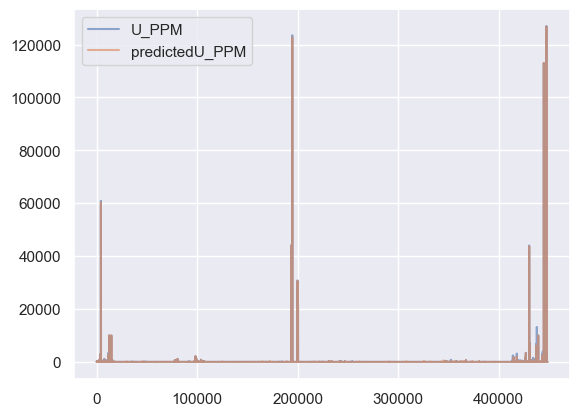

In [22]:
xgbr_model.fit(X,y)
gcnum['predictedU_PPM'] = xgbr_model.predict(X)
gcnum[['U_PPM', 'predictedU_PPM']].plot(alpha=0.6)

<Figure size 1000x700 with 0 Axes>

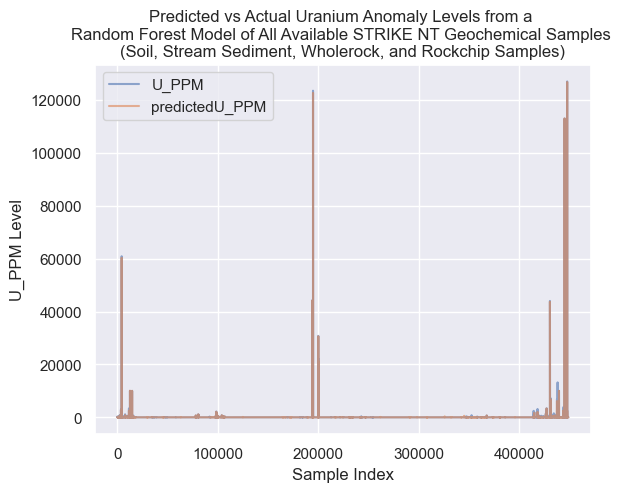

In [23]:
plt.figure(figsize=(10,7))
gcnum[['U_PPM', 'predictedU_PPM']].plot(alpha=0.6)
plt.ylabel("U_PPM Level")
plt.xlabel("Sample Index")
plt.title("Predicted vs Actual Uranium Anomaly Levels from a \nXGBoost Regression Model of All Available STRIKE NT Geochemical Samples \n(Soil, Stream Sediment, Wholerock, and Rockchip Samples)")
plt.savefig('RFRmodel NT-Wide U_PPM Prediction.png',  bbox_inches='tight')

## Model Training AFTER Tuning

### Hyperparameter Tuning

In [29]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to search
param_grid = {'n_estimators': [10, 20], # define number of estimators to use in forest
              'max_depth': [50, 60, 70], # define maximum depth of trees
              'random_state': [77]}  # use random_state to set seed for reproducibility

# Use GridSearchCV to perform hyperparameter search and k-fold cross-validation
grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(best_params)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END max_depth=50, n_estimators=10, random_state=77;, score=-16378.540 total time=  15.2s
[CV 2/3] END max_depth=50, n_estimators=10, random_state=77;, score=-66899.387 total time=  15.8s
[CV 3/3] END max_depth=50, n_estimators=10, random_state=77;, score=-67586.603 total time=  16.8s
[CV 1/3] END max_depth=50, n_estimators=20, random_state=77;, score=-21508.199 total time=  29.1s
[CV 2/3] END max_depth=50, n_estimators=20, random_state=77;, score=-77489.711 total time=  31.5s
[CV 3/3] END max_depth=50, n_estimators=20, random_state=77;, score=-69284.695 total time=  34.0s
[CV 1/3] END max_depth=60, n_estimators=10, random_state=77;, score=-16379.471 total time=  20.7s
[CV 2/3] END max_depth=60, n_estimators=10, random_state=77;, score=-66899.123 total time=  22.7s
[CV 3/3] END max_depth=60, n_estimators=10, random_state=77;, score=-67586.976 total time=  23.6s
[CV 1/3] END max_depth=60, n_estimators=20, random_state=7

### Train and Fit Tuned Model to Data

In [30]:
tuned_xgbr_model = XGBRegressor(**best_params) # Generate the model with the tuned parameters
tuned_xgbr_model.fit(X_train, y_train) # Fit the training data to the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=50, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=77, ...)

## Evaluation AFTER Tuning

### Evaluate Tuned Model with MSE and RMSE

In [31]:
print('Tuned Random Forest Regression Model')
y_tuned_xgbr_train_predict = tuned_xgbr_model.predict(X_train) # Prediction in the training dataset
y_tuned_xgbr_test_predict = tuned_xgbr_model.predict(X_test) # Prediction in the testing dataset

RMSE_training = np.sqrt(mean_squared_error(y_train, y_tuned_xgbr_train_predict)) # use pandas .sqrt() function to get training RMSE
RMSE_test = np.sqrt(mean_squared_error(y_test, y_tuned_xgbr_test_predict)) # use pandas .sqrt() function to get test RMSE

print('The baseline RMSE is', rmse)
print('The model RMSE in training is', RMSE_training)
print('The model RMSE in testing is', RMSE_test)

Tuned Random Forest Regression Model
The baseline RMSE is 763.4583938923756
The model RMSE in training is 44.68805925515733
The model RMSE in testing is 405.63152397738713


### Plot of Predicted Values vs Actual Values

<AxesSubplot:>

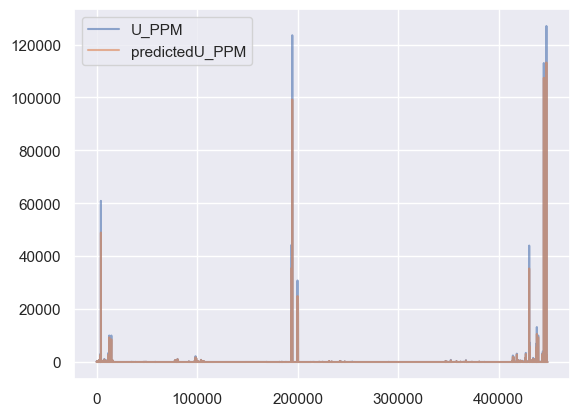

In [32]:
# Train the model again on X and y then plot over actual values
tuned_xgbr_model.fit(X,y)
gcnum['predictedU_PPM'] = tuned_xgbr_model.predict(X)
gcnum[['U_PPM', 'predictedU_PPM']].plot(alpha=0.6)

<Figure size 1000x700 with 0 Axes>

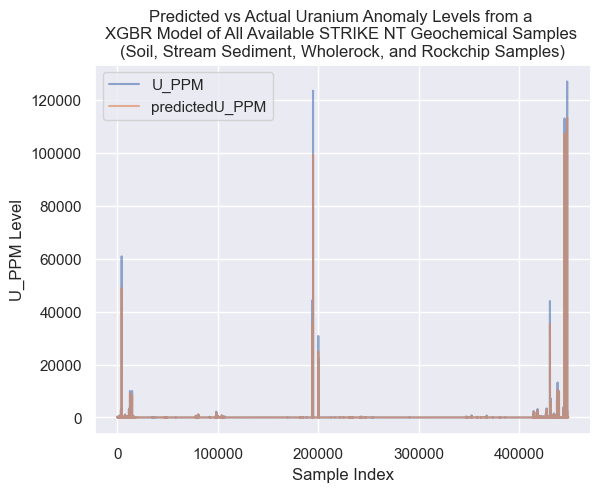

In [33]:
plt.figure(figsize=(10,7))
gcnum[['U_PPM', 'predictedU_PPM']].plot(alpha=0.6)
plt.ylabel("U_PPM Level")
plt.xlabel("Sample Index")
plt.title("Predicted vs Actual Uranium Anomaly Levels from a \nXGBR Model of All Available STRIKE NT Geochemical Samples \n(Soil, Stream Sediment, Wholerock, and Rockchip Samples)")
plt.savefig('RFRmodel NT-Wide U_PPM Prediction.png',  bbox_inches='tight')